In [74]:
import pandas as pd
import seaborn
import pylab as pl
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
all_sa = pd.read_csv('all_nyc_sa_for_map.csv')

In [64]:
all_sa['Total Buildings'] = (all_sa['Building Type_Commercial & Office Buildings'] +
                           all_sa['Building Type_Industrial & Manufacturing Buildings'] +
                           all_sa['Building Type_Mixed Residential & Commercial Buildings'] +
                           all_sa['Building Type_Multi-Family Elevator Buildings'] +
                           all_sa['Building Type_Multi-Family Walk-Up Buildings'] + 
                           all_sa['Building Type_One & Two Family Buildings'] + 
                           all_sa['Building Type_Open Space & Outdoor Recreation'] +
                           all_sa['Building Type_Parking Facilities'] +
                           all_sa['Building Type_Public Facilities & Institutions'] +
                           all_sa['Building Type_Transportation & Utility'] + 
                           all_sa['Building Type_Vacant Land'])
all_sa['Perc_Commercial'] = all_sa['Building Type_Commercial & Office Buildings'] * 1.0 / all_sa['Total Buildings']
all_sa['Perc_Indust_Manuf'] = all_sa['Building Type_Industrial & Manufacturing Buildings'] * 1.0 / all_sa['Total Buildings']
all_sa['Perc_Res_Commerc'] = all_sa['Building Type_Mixed Residential & Commercial Buildings'] * 1.0 / all_sa['Total Buildings']
all_sa['Perc_Multi_Elev'] = all_sa['Building Type_Multi-Family Elevator Buildings'] * 1.0 / all_sa['Total Buildings']
all_sa['Perc_Multi_Walkup'] = all_sa['Building Type_Multi-Family Walk-Up Buildings'] * 1.0 / all_sa['Total Buildings'] 
all_sa['Perc_One_Two'] = all_sa['Building Type_One & Two Family Buildings'] * 1.0 / all_sa['Total Buildings'] 
all_sa['Perc_Open_Space'] = all_sa['Building Type_Open Space & Outdoor Recreation'] * 1.0 / all_sa['Total Buildings']
all_sa['Perc_Parking'] = all_sa['Building Type_Parking Facilities'] * 1.0 / all_sa['Total Buildings']
all_sa['Perc_Public_Facilities'] = all_sa['Building Type_Public Facilities & Institutions'] * 1.0 / all_sa['Total Buildings']
all_sa['Perc_Transport_Utility'] = all_sa['Building Type_Transportation & Utility'] * 1.0 / all_sa['Total Buildings'] 
all_sa['Perc_Vacant'] = all_sa['Building Type_Vacant Land'] * 1.0 / all_sa['Total Buildings']

In [65]:
def boro(fips):
    if fips >= 36085000000:
        boro = 'SI'
    elif fips >= 36081000000:
        boro = 'QN'
    elif fips >= 36061000000:
        boro = 'MN'
    elif fips >= 36047000000:
        boro = 'BK'
    elif fips >= 36005000000:
        boro = 'BX'
    return boro

In [66]:
all_sa['boro'] = all_sa['FIPS'].apply(boro)

In [67]:
# Used for Local Moran Chart

all_sa.groupby(['boro', 'quadrant']).count()[['FIPS']]

FIPS
boro quadrant      
BK   1          231
     2            1
     3          201
     4            1
BX   1           45
     2            4
     3           57
     4            9
MN   1           58
     3          100
     4            1
QN   1           65
     2           11
     3           80
     4            1
SI   1            4
     2            1
     3            3

In [68]:
# Used for investigation of all quadrants to identify variation
# Significance at alpha = 0.05

from scipy import stats
count = 0
for i in all_sa.columns:
    try:
        f_val, p_val = stats.f_oneway(all_sa[all_sa['quadrant'] == 1][i],all_sa[all_sa['quadrant'] == 2][i], all_sa[all_sa['quadrant'] == 3][i],all_sa[all_sa['quadrant'] == 4][i],)
        if p_val < .05:
            print i, "One-way ANOVA P =",   p_val  
            count += 1
    except:
        continue
print count

FIPS One-way ANOVA P = 1.96309968518e-06
quadrant One-way ANOVA P = 0.0
avg_down One-way ANOVA P = 5.84411290881e-216
avg_up One-way ANOVA P = 7.2607846405e-240
max_down One-way ANOVA P = 5.16816232485e-234
max_up One-way ANOVA P = 4.1231587768e-272
num_providers One-way ANOVA P = 0.000244539630083
num_platforms One-way ANOVA P = 1.86001225879e-116
bscore_raw One-way ANOVA P = 2.51084835837e-239
bscore_norm One-way ANOVA P = 2.51084831751e-239
ComArea One-way ANOVA P = 0.0499715282612
GarageArea One-way ANOVA P = 0.00292198765
StrgeArea One-way ANOVA P = 0.0016905283118
FactryArea One-way ANOVA P = 0.00539458102368
NumFloors One-way ANOVA P = 0.000580934486869
Building Type_Industrial & Manufacturing Buildings One-way ANOVA P = 1.0370893999e-05
Building Type_Mixed Residential & Commercial Buildings One-way ANOVA P = 1.42138978701e-10
Building Type_Multi-Family Elevator Buildings One-way ANOVA P = 5.09857365238e-06
Building Type_Multi-Family Walk-Up Buildings One-way ANOVA P = 6.8813708

In [69]:
# investigation of low-low and low-surrounded by low
count = 0
for i in all_sa.columns:
    try:
        f_val, p_val = stats.f_oneway(all_sa[all_sa['quadrant'] == 2][i], all_sa[all_sa['quadrant'] == 3][i])
        if p_val < .05:
            print i, "One-way ANOVA P =",   p_val  
            count += 1
    except:
        continue
print count

quadrant One-way ANOVA P = 0.0
avg_down One-way ANOVA P = 4.94613989862e-09
max_down One-way ANOVA P = 0.000692375253403
max_up One-way ANOVA P = 0.0168531211901
top_plat_ratio One-way ANOVA P = 0.0348809125543
bscore_raw One-way ANOVA P = 1.92675576987e-08
bscore_norm One-way ANOVA P = 1.92675576578e-08
RetailArea One-way ANOVA P = 0.0188857923143
GarageArea One-way ANOVA P = 0.0031477774071
Households: $15_000 to $19_999 One-way ANOVA P = 0.0127817314327
Households: $35_000 to $39_999 One-way ANOVA P = 0.00179788749345
Households: $45_000 to $49_999 One-way ANOVA P = 0.0400166551462
Perc_Indust_Manuf One-way ANOVA P = 0.00475457997036
Perc_Res_Commerc One-way ANOVA P = 0.0263408980127
14


In [70]:
# investigation of high-high and high-surrounded by low
count = 0
for i in all_sa.columns:
    try:
        f_val, p_val = stats.f_oneway(all_sa[all_sa['quadrant'] == 4][i], all_sa[all_sa['quadrant'] == 1][i])
        if p_val < .05:
            print i, "One-way ANOVA P =",   p_val  
            count += 1
    except:
        continue
print count

FIPS One-way ANOVA P = 5.7343801583e-07
quadrant One-way ANOVA P = 0.0
avg_down One-way ANOVA P = 5.3226454373e-10
avg_up One-way ANOVA P = 2.15346233691e-09
max_down One-way ANOVA P = 1.68171499294e-10
max_up One-way ANOVA P = 4.53072243389e-10
num_platforms One-way ANOVA P = 0.000363505922978
bscore_raw One-way ANOVA P = 1.61783910024e-10
bscore_norm One-way ANOVA P = 1.61783909892e-10
Households: Less than $10_000 One-way ANOVA P = 0.0053256093199
Households: $10_000 to $14_999 One-way ANOVA P = 0.00207825276142
Households: $125_000 to $149_999 One-way ANOVA P = 0.0253135720902
Households: $150_000 to $199_999 One-way ANOVA P = 0.0403263738778
Perc_Parking One-way ANOVA P = 0.0108266307426
14


In [71]:
# investigation of high-high and low-surrounded by high
count = 0
for i in all_sa.columns:
    try:
        f_val, p_val = stats.f_oneway(all_sa[all_sa['quadrant'] == 2][i], all_sa[all_sa['quadrant'] == 1][i])
        if p_val < .05:
            print i, "One-way ANOVA P =",   p_val  
            count += 1
    except:
        continue
print count

FIPS One-way ANOVA P = 0.0327193159932
quadrant One-way ANOVA P = 0.0
avg_down One-way ANOVA P = 1.45242761207e-11
avg_up One-way ANOVA P = 4.87243745178e-18
max_down One-way ANOVA P = 6.21446485073e-16
max_up One-way ANOVA P = 1.67932205847e-21
num_platforms One-way ANOVA P = 1.05221424494e-11
bscore_raw One-way ANOVA P = 9.28291337889e-15
bscore_norm One-way ANOVA P = 9.2829133768e-15
RetailArea One-way ANOVA P = 0.0136915918413
GarageArea One-way ANOVA P = 0.000684289609538
Building Type_Mixed Residential & Commercial Buildings One-way ANOVA P = 0.0368892886652
Total Population: One-way ANOVA P = 0.0330867697456
Households: $15_000 to $19_999 One-way ANOVA P = 0.00173974363484
Households: $25_000 to $29_999 One-way ANOVA P = 0.0129625899202
Households: $30_000 to $34_999 One-way ANOVA P = 0.00951483927863
Households: $35_000 to $39_999 One-way ANOVA P = 4.39129016816e-05
Households: $40_000 to $44_999 One-way ANOVA P = 0.0289838521408
Households: $45_000 to $49_999 One-way ANOVA P =

In [94]:
import scipy
boros = ['SI', 'MN', 'QN', 'BK', 'BX']
for i in all_sa.columns:
    for j in boros[1:]:
        try:
            if scipy.stats.pearsonr(list(all_sa[all_sa['boro']==j]['bscore_norm'].values), list(all_sa[all_sa['boro']==j][i].values))[0] > .7:
                print j, i, scipy.stats.pearsonr(list(all_sa[all_sa['boro']==j]['bscore_norm'].values), list(all_sa[all_sa['boro']==j][i].values))#[0]
            if scipy.stats.pearsonr(list(all_sa[all_sa['boro']==j]['bscore_norm'].values), list(all_sa[all_sa['boro']==j][i].values))[0] < -0.7:
                print j, i, scipy.stats.pearsonr(list(all_sa[all_sa['boro']==j]['bscore_norm'].values), list(all_sa[all_sa['boro']==j][i].values))#[0]
        except:
            continue

MN FIPS (-0.75356562347678313, 2.0919584111737802e-30)
MN quadrant (-0.8669523287103319, 2.4150999040030031e-49)
QN quadrant (-0.91928467572459271, 1.1871646046131571e-64)
BK quadrant (-0.97300996885952451, 3.0452923429383933e-277)
MN avg_down (0.98728055204976939, 2.6478399382911341e-127)
QN avg_down (0.99440836926977083, 3.008167599900108e-153)
BK avg_down (0.99715257816221126, 0.0)
BX avg_down (0.98036654344153007, 1.5971344493526157e-81)
MN avg_up (0.99436010688075138, 6.5323346894795284e-155)
QN avg_up (0.99112117141661782, 9.7170122527045807e-138)
BK avg_up (0.99315647229086856, 0.0)
BX avg_up (0.85634751955254151, 3.2200930595725219e-34)
MN max_down (0.91513456657756553, 7.9304954195528054e-64)
QN max_down (0.94953018424388469, 6.0644865656006671e-80)
BK max_down (0.9746129217008932, 6.5390774922401007e-283)
MN max_up (0.9131193702893714, 4.6177783051511785e-63)
QN max_up (0.94932612630322177, 8.2256981333852898e-80)
BK max_up (0.97506490412012681, 1.4178262795294423e-284)
QN nu

In [79]:
# import scipy
# boros = ['SI', 'MN', 'QN', 'BK', 'BX']
for i in all_sa.columns:
    try:
        if scipy.stats.pearsonr(list(all_sa['bscore_norm'].values), list(all_sa[i].values))[0] > .3:
            print i, scipy.stats.pearsonr(list(all_sa['bscore_norm'].values), list(all_sa[i].values))#[0]
        if scipy.stats.pearsonr(list(all_sa['bscore_norm'].values), list(all_sa[i].values))[0] < -0.3:
            print i, scipy.stats.pearsonr(list(all_sa['bscore_norm'].values), list(all_sa[i].values))#[0]
    except:
        continue

quadrant (-0.83405503431476702, 3.3176918316881345e-227)
avg_down (0.99496626864923321, 0.0)
avg_up (0.98057061225020592, 0.0)
max_down (0.95997451003907974, 0.0)
max_up (0.95728167654760665, 0.0)
num_platforms (0.7468905982384153, 1.6055591426001061e-156)
bscore_raw (1.0, 0.0)
bscore_norm (1.0, 0.0)


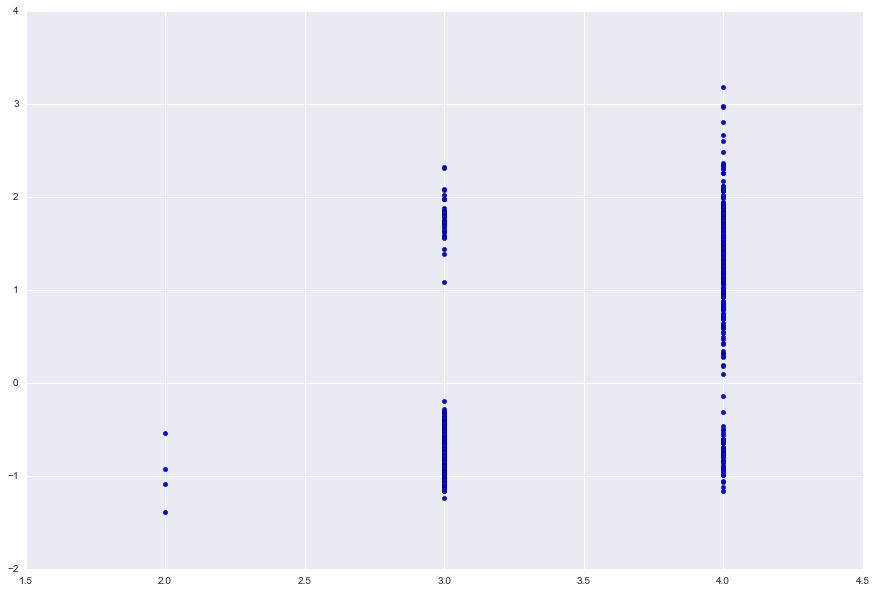

In [92]:
fig = pl.figure(figsize=(15,10))
# colors_ = ['r','b','k','g']


pl.subplot(111)
pl.scatter(all_sa['num_platforms'], all_sa['bscore_norm'])


(0.72870925110260898, 2.685209208514284e-20)


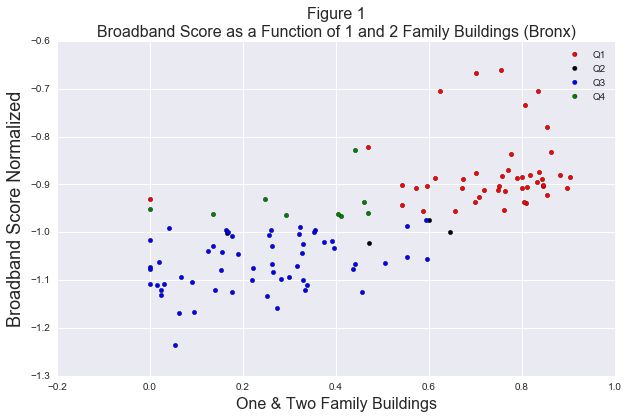

In [135]:
fig = pl.figure(figsize=(10,6))


# colors_ = ['r','b','k','g']
#colors = pd.tools.plotting._get_standard_colors(len(groups), color_type='random')

pl.subplot(111)
pl.scatter(all_sa[(all_sa['boro']=='BX') & (all_sa['quadrant']==1) ]['Perc_One_Two'], all_sa[(all_sa['boro']=='BX') & (all_sa['quadrant']==1) ]['bscore_norm'], c='r', label='Q1')
pl.scatter(all_sa[(all_sa['boro']=='BX') & (all_sa['quadrant']==2) ]['Perc_One_Two'], all_sa[(all_sa['boro']=='BX') & (all_sa['quadrant']==2) ]['bscore_norm'], c='k', label='Q2')
pl.scatter(all_sa[(all_sa['boro']=='BX') & (all_sa['quadrant']==3) ]['Perc_One_Two'], all_sa[(all_sa['boro']=='BX') & (all_sa['quadrant']==3) ]['bscore_norm'], c='b', label='Q3')
pl.scatter(all_sa[(all_sa['boro']=='BX') & (all_sa['quadrant']==4) ]['Perc_One_Two'], all_sa[(all_sa['boro']=='BX') & (all_sa['quadrant']==4) ]['bscore_norm'], c='g', label='Q4')
#pl.plot([-0.1, -0.1*0.72870925110260898], [1.1, 1.1*0.72870925110260898])
pl.legend()
pl.ylabel('Broadband Score Normalized', fontsize=18)
pl.xlabel('One & Two Family Buildings', fontsize=16)
pl.title('Figure 1\nBroadband Score as a Function of 1 and 2 Family Buildings (Bronx)', fontsize=16)
print scipy.stats.pearsonr(list(all_sa[all_sa['boro']=='BX']['bscore_norm'].values), list(all_sa[all_sa['boro']=='BX']['Perc_One_Two'].values))#[0]

(-0.17535594017623804, 1.8461538657908767e-07)
(-0.17535594017623804, 1.8461538657908767e-07)


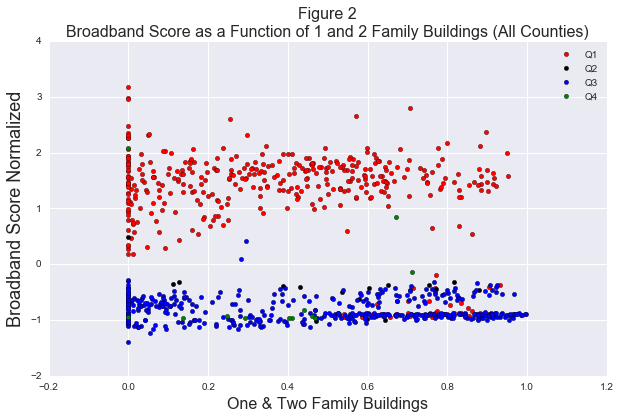

In [140]:
fig = pl.figure(figsize=(10,6))

# colors_ = ['r','b','k','g']
#colors = pd.tools.plotting._get_standard_colors(len(groups), color_type='random')

pl.subplot(111)
pl.scatter(all_sa[(all_sa['quadrant']==1) ]['Perc_One_Two'], all_sa[(all_sa['quadrant']==1) ]['bscore_norm'], c='r', label='Q1')
pl.scatter(all_sa[(all_sa['quadrant']==2) ]['Perc_One_Two'], all_sa[(all_sa['quadrant']==2) ]['bscore_norm'], c='k', label='Q2')
pl.scatter(all_sa[(all_sa['quadrant']==3) ]['Perc_One_Two'], all_sa[(all_sa['quadrant']==3) ]['bscore_norm'], c='b', label='Q3')
pl.scatter(all_sa[(all_sa['quadrant']==4) ]['Perc_One_Two'], all_sa[(all_sa['quadrant']==4) ]['bscore_norm'], c='g', label='Q4')
pl.legend()
pl.ylabel('Broadband Score Normalized', fontsize=18)
pl.xlabel('One & Two Family Buildings', fontsize=16)
pl.title('Figure 2\nBroadband Score as a Function of 1 and 2 Family Buildings (All Counties)', fontsize=16)
print scipy.stats.pearsonr(list(all_sa['bscore_norm'].values), list(all_sa['Perc_One_Two'].values))#[0]
print scipy.stats.pearsonr(list(all_sa['bscore_norm'].values), list(all_sa['Perc_One_Two'].values))

In [121]:
list(all_sa.columns)

['FIPS',
 'quadrant',
 'avg_down',
 'avg_up',
 'max_down',
 'max_up',
 'num_providers',
 'num_platforms',
 'top_plat_type',
 'top_plat_ratio',
 'bscore_raw',
 'bscore_norm',
 'BldgArea',
 'ComArea',
 'ResArea',
 'OfficeArea',
 'RetailArea',
 'GarageArea',
 'StrgeArea',
 'FactryArea',
 'NumBldgs',
 'NumFloors',
 'UnitsRes',
 'UnitsTotal',
 'Building Type_Commercial & Office Buildings',
 'Building Type_Industrial & Manufacturing Buildings',
 'Building Type_Mixed Residential & Commercial Buildings',
 'Building Type_Multi-Family Elevator Buildings',
 'Building Type_Multi-Family Walk-Up Buildings',
 'Building Type_One & Two Family Buildings',
 'Building Type_Open Space & Outdoor Recreation',
 'Building Type_Parking Facilities',
 'Building Type_Public Facilities & Institutions',
 'Building Type_Transportation & Utility',
 'Building Type_Vacant Land',
 'Population Density (per sq. mile)',
 'Area (Land)',
 'Area Total:',
 'Area Total: Area (Water)',
 'Total Population:',
 'Households:',
 'Hous